<a href="https://colab.research.google.com/github/salmakelany/salmakelany/blob/main/apl_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chapter 1**

In [1]:
# Zen of Python
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# Bytecode Inspection – square(x)
def square(x):
    return x * x

import dis
dis.dis(square)

  2           0 RESUME                   0

  3           2 LOAD_FAST                0 (x)
              4 LOAD_FAST                0 (x)
              6 BINARY_OP                5 (*)
             10 RETURN_VALUE


In [3]:
# Bytecode Inspection – multiply(a, b)
def multiply(a, b):
    return a * b

import dis
dis.dis(multiply)

  2           0 RESUME                   0

  3           2 LOAD_FAST                0 (a)
              4 LOAD_FAST                1 (b)
              6 BINARY_OP                5 (*)
             10 RETURN_VALUE


In [4]:
# Dynamic Typing in Action

# Step 1: Create a variable
data = 10
print(type(data))

# Step 2: Reassign it to a string
data = "Hello"
print(type(data))

# Step 3: Reassign it to a list
data = [1, 2, 3]
print(type(data))

# Step 4: Reassign it to a function
def my_func():
    pass

data = my_func
print(type(data))

<class 'int'>
<class 'str'>
<class 'list'>
<class 'function'>


In [5]:
# AST (Abstract Syntax Tree) Exploration
import ast

y = (4 * 5) - 3

tree = ast.parse("y = (4 * 5) - 3")
print(ast.dump(tree, indent=4))


Module(
    body=[
        Assign(
            targets=[
                Name(id='y', ctx=Store())],
            value=BinOp(
                left=BinOp(
                    left=Constant(value=4),
                    op=Mult(),
                    right=Constant(value=5)),
                op=Sub(),
                right=Constant(value=3)))],
    type_ignores=[])


In [7]:
# Mutability and Object Identity
my_list = [10, 20, 30]

# Print the memory address
print(id(my_list))

# Append a new value
my_list.append(40)

# Print address again
print(id(my_list))

138593645844160
138593645844160


**chapter 2**

In [13]:
# Vector3D Class with Operator Overloading
class Vector3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vector3D(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vector3D(self.x - other.x, self.y - other.y, self.z - other.z)

    def __mul__(self, other):  # dot product
        return self.x * other.x + self.y * other.y + self.z * other.z

    def __repr__(self):
        return f"Vector3D({self.x}, {self.y}, {self.z})"

In [14]:
# Positive Number Descriptor
class Positive:
    def __set_name__(self, owner, name):
        self.name = name

    def __get__(self, instance, owner):
        return instance.__dict__[self.name]

    def __set__(self, instance, value):
        if value < 0:
            raise ValueError("Value must be non-negative")
        instance.__dict__[self.name] = value

In [15]:
# BankAccount Class
class BankAccount:
    balance = Positive()

    def __init__(self, balance):
        self.balance = balance

In [19]:
# Point Class Using __slots__
class Point:
    __slots__ = ("x", "y")

    def __init__(self, x, y):
        self.x = x
        self.y = y
        # Test
p = Point(2, 5)
# p.z = 10  # This will raise an AttributeError

In [20]:
# Disassembling a Simple Function
def calculate_sum(a, b):
    return a + b

# Use dis module
import dis
dis.dis(calculate_sum)

  2           0 RESUME                   0

  3           2 LOAD_FAST                0 (a)
              4 LOAD_FAST                1 (b)
              6 BINARY_OP                0 (+)
             10 RETURN_VALUE


**chapter 3**

In [21]:
# remove_vowels(string)
def remove_vowels(text):
    vowels = "aeiouAEIOU"
    return "".join(ch for ch in text if ch not in vowels)

In [23]:
# Squares of odd numbers using map() and filter()
nums = [1, 2, 3, 4, 5, 6]

result = list(
    map(lambda x: x * x,
        filter(lambda n: n % 2 == 1, nums))
)

print(result)

[1, 9, 25]


In [24]:
# Fibonacci using recursion and lru_cache
from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n):
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)

In [25]:
# Closure make_adder(n)
def make_adder(n):
    def add(x):
        return x + n
    return add

In [26]:
# apply_twice(func, value)
def apply_twice(func, value):
    return func(func(value))

In [27]:
# Simple ETL pipeline
def etl(words):
    stop = {"the", "is", "and", "at"}
    cleaned = [w.lower() for w in words]
    filtered = [w for w in cleaned if w not in stop]

    freq = {}
    for w in filtered:
        freq[w] = freq.get(w, 0) + 1

    return freq

In [28]:
# Custom reduce function
def my_reduce(func, seq, initial=None):
    it = iter(seq)
    if initial is None:
        value = next(it)
    else:
        value = initial

    for x in it:
        value = func(value, x)

    return value

In [29]:
# Decorator log_calls()
def log_calls(func):
    def wrapper(*args, **kwargs):
        print("Calling function...")
        result = func(*args, **kwargs)
        print("Function finished.")
        return result
    return wrapper

In [30]:
# Difference between map(), filter(), reduce()
map_example = list(map(lambda x: x * 2, [1, 2, 3]))      # [2, 4, 6]
filter_example = list(filter(lambda x: x > 2, [1, 2, 3]))  # [3]

from functools import reduce
reduce_example = reduce(lambda x, y: x + y, [1, 2, 3])  # 6

In [31]:
# Pure function example
def add(a, b):
    return a + b

**chapter 4**

In [32]:
# Email Validation using regex
import re

pattern = r"^[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.(com|org|edu)$"

emails = ["user@example.com", "bad-email", "test@domain.org"]
for e in emails:
    print(e, bool(re.match(pattern, e)))

user@example.com True
bad-email False
test@domain.org True


In [33]:
# Extract Hashtags using regex
import re

text = "I love #Python and #AI"
print(re.findall(r"#\w+", text))

['#Python', '#AI']


In [34]:
# Validate Phone Numbers using regex
import re

pattern = r"^\(\+1-\d{3}\)-\d{3}-\d{4}$"

In [35]:
# Word Frequency using regex
import re

text = "Python, Python! AI is great; Python AI."
words = re.findall(r"\w+", text.lower())

freq = {}
for w in words:
    freq[w] = freq.get(w, 0) + 1

print(freq)

{'python': 3, 'ai': 2, 'is': 1, 'great': 1}


In [36]:
# Find Duplicate Consecutive Words
import re

text = "This is is a test test"
duplicates = re.findall(r"\b(\w+)\s+\1\b", text)

print(duplicates)

['is', 'test']


In [37]:
# Extract Dates using regex
import re

text = "The events are on 2023-05-12 and 2024-01-01."
dates = re.findall(r"\d{4}-\d{2}-\d{2}", text)

print(dates)

['2023-05-12', '2024-01-01']


In [38]:
# Mask Sensitive Data (Credit Card)
import re

text = "Card: 1234-5678-9012-3456"
result = re.sub(r"\d(?=\d{4})", "*", text)

print(result)

Card: 1234-5678-9012-3456


In [39]:
# Extract Programming Languages
import re

text = "I know Python, Java, and C++ but not Ruby"
langs = re.findall(r"Python|Java|C\+\+|Ruby", text)

print(langs)

['Python', 'Java', 'C++', 'Ruby']


**chapter 5**

In [40]:
# Rectangle Class
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

rect = Rectangle(5, 10)

print("Area:", rect.area())
print("Perimeter:", rect.perimeter())

Area: 50
Perimeter: 30


In [41]:
# Employee Class with Alternative Constructor
class Employee:
    def __init__(self, name, employee_id, salary):
        self.name = name
        self.employee_id = employee_id
        self.salary = salary

    @classmethod
    def from_string(cls, employee_str):
        name, employee_id, salary = employee_str.split(",")
        return cls(name, employee_id, int(salary))

    def display_employee_info(self):
        print(f"Name: {self.name}, ID: {self.employee_id}, Salary: {self.salary}")

emp = Employee.from_string("John Doe,E123,50000")

emp.display_employee_info()

Name: John Doe, ID: E123, Salary: 50000


In [42]:
# Vehicle Hierarchy and Polymorphism
class Vehicle:
    def move(self):
        print("Vehicle is moving")

class Car(Vehicle):
    def move(self):
        print("Car is driving")

class Bike(Vehicle):
    def move(self):
        print("Bike is cycling")

vehicles = [Vehicle(), Car(), Bike()]

for v in vehicles:
    v.move()

Vehicle is moving
Car is driving
Bike is cycling


In [43]:
# Vector Class with Operator Overloading
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        return self.x * other.x + self.y * other.y

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

v1 = Vector(3, 4)
v2 = Vector(1, 2)

print("Subtraction:", v1 - v2)
print("Dot Product:", v1 * v2)

Subtraction: Vector(2, 2)
Dot Product: 11


In [44]:
# Shape Polymorphism Function
class Shape:
    def area(self):
        return 0

class Circle(Shape):
    def __init__(self, r):
        self.r = r

    def area(self):
        return 3.14 * self.r ** 2

class Rectangle(Shape):
    def __init__(self, l, b):
        self.l = l
        self.b = b

    def area(self):
        return self.l * self.b

c = Circle(5)
r = Rectangle(4, 6)

print("Area of circle:", c.area())
print("Area of rectangle:", r.area())

Area of circle: 78.5
Area of rectangle: 24


**chapter 6**

In [45]:
# Read CSV file and print names of students who scored above 80
import csv

students = [
    ["ID", "Name", "Grade"],
    [1, "Ali", 85],
    [2, "Mona", 92],
    [3, "Omar", 78]
]

with open("students.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(students)

with open("students.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if int(row["Grade"]) > 80:
            print(row["Name"])

Ali
Mona


In [46]:
# Write dictionary to JSON file and read it back
import json

data = {
    "course": "Python",
    "duration": "3 months",
    "students": ["Ali", "Sara"]
}

with open("course.json", "w") as f:
    json.dump(data, f)

with open("course.json", "r") as f:
    content = json.load(f)

print(content["students"])

['Ali', 'Sara']


In [47]:
# Create DataFrame, save to Excel, then read and print specific columns
import pandas as pd

df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "salary": [50000, 60000, 55000, 70000, 65000]
})

df.to_excel("employees.xlsx", index=False)

df2 = pd.read_excel("employees.xlsx")

print(df2[["name", "salary"]])

      name  salary
0    Alice   50000
1      Bob   60000
2  Charlie   55000
3    David   70000
4      Eva   65000


In [48]:
# Convert CSV file into JSON with hierarchical structure
import csv
import json

data = [
    ["Name", "Age", "City"],
    ["Ali", 25, "Cairo"],
    ["Mona", 30, "Alex"]
]

with open("input.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(data)

def csv_to_json(csv_file, json_file):
    people = []

    with open(csv_file, "r") as f:
        reader = csv.DictReader(f)
        for row in reader:
            people.append({
                "Name": row["Name"],
                "Age": int(row["Age"]),
                "City": row["City"]
            })

    output = {"people": people}

    with open(json_file, "w") as f:
        json.dump(output, f, indent=4)

csv_to_json("input.csv", "output.json")

with open("output.json", "r") as f:
    print(f.read())

{
    "people": [
        {
            "Name": "Ali",
            "Age": 25,
            "City": "Cairo"
        },
        {
            "Name": "Mona",
            "Age": 30,
            "City": "Alex"
        }
    ]
}


**chapter 7**

In [49]:
# Create SQLite database, insert students, and display records
import sqlite3

conn = sqlite3.connect("school.db")
c = conn.cursor()

c.execute("""
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY,
    name TEXT,
    grade REAL
)
""")

students = [
    (1, "Ali", 85.5),
    (2, "Sara", 92.0),
    (3, "Mohamed", 78.3)
]

c.executemany("INSERT OR REPLACE INTO students VALUES (?, ?, ?)", students)

c.execute("SELECT * FROM students")
rows = c.fetchall()

for row in rows:
    print(row)

conn.commit()
conn.close()

(1, 'Ali', 85.5)
(2, 'Sara', 92.0)
(3, 'Mohamed', 78.3)


In [50]:
# Insert user input safely using parameterized queries
import sqlite3

conn = sqlite3.connect("school.db")
c = conn.cursor()

name = input("Enter name: ")
grade = float(input("Enter grade: "))

c.execute(
    "INSERT INTO students (name, grade) VALUES (?, ?)",
    (name, grade)
)

print("--- Updated Records ---")

c.execute("SELECT * FROM students")
rows = c.fetchall()

for row in rows:
    print(row)

conn.commit()
conn.close()

Enter name: salma
Enter grade: 3
--- Updated Records ---
(1, 'Ali', 85.5)
(2, 'Sara', 92.0)
(3, 'Mohamed', 78.3)
(4, 'salma', 3.0)


In [51]:
# Demonstrate transaction with rollback on error
import sqlite3

conn = sqlite3.connect("school.db")
c = conn.cursor()

try:
    print("Starting transaction")
    conn.execute("BEGIN")

    c.execute("INSERT INTO students (name, grade) VALUES (?, ?)", ("Lina", 88.7))
    c.execute("INSERT INTO students (name, grade) VALUES (?, ?)", ("Omar", 91.2))

    error = 1 / 0   # Simulated error

    conn.commit()

except Exception as e:
    print("An error occurred:", e)
    conn.rollback()
    print("Transaction rolled back")

finally:
    print("Final Records:")
    c.execute("SELECT * FROM students")
    rows = c.fetchall()
    for row in rows:
        print(row)

conn.close()

Starting transaction
An error occurred: division by zero
Transaction rolled back
Final Records:
(1, 'Ali', 85.5)
(2, 'Sara', 92.0)
(3, 'Mohamed', 78.3)
(4, 'salma', 3.0)


In [52]:
# SQLAlchemy ORM example: create table, insert books, and display them
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import declarative_base, sessionmaker

Base = declarative_base()

class Book(Base):
    __tablename__ = "books"

    id = Column(Integer, primary_key=True)
    title = Column(String)
    author = Column(String)

    def __repr__(self):
        return f"Book(id={self.id}, title='{self.title}', author='{self.author}')"

engine = create_engine("sqlite:///books.db")
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

book1 = Book(title="Python Basics", author="Guido")
book2 = Book(title="AI with Python", author="Mohamed")

session.add_all([book1, book2])
session.commit()

books = session.query(Book).all()

for b in books:
    print(b)

Book(id=1, title='Python Basics', author='Guido')
Book(id=2, title='AI with Python', author='Mohamed')


**chapter 8**

In [53]:
# Create NumPy array and calculate mean, median, and standard deviation
import numpy as np

num = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

mean = np.mean(num)
median = np.median(num)
std = np.std(num)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)

Mean: 5.5
Median: 5.5
Standard Deviation: 2.8722813232690143


In [54]:
# Create DataFrame and filter students with score above 80
import pandas as pd

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "John"],
    "Age": [25, 30, 35, 20],
    "Score": [85.5, 90.0, 95.5, 70.0]
})

filtered = df[df["Score"] > 80]

print(filtered)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   90.0
2  Charlie   35   95.5


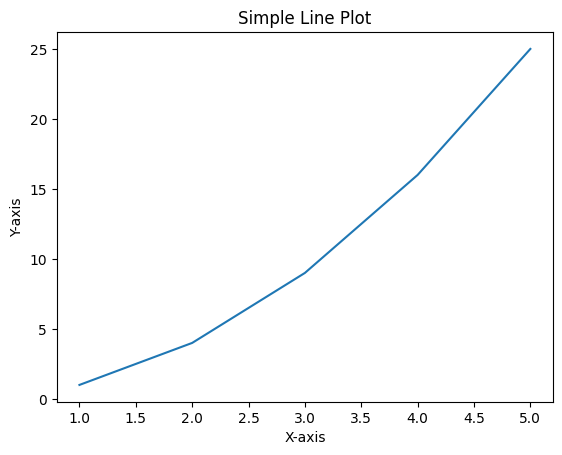

In [55]:
# Plot a simple line graph using Matplotlib
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Simple Line Plot")
plt.show()

In [58]:
# Minimal Flask app with /hello route
from flask import Flask

app = Flask(__name__)

@app.route("/hello")
def home():
    return "Hello, Advanced Python!"

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [59]:
# PyTorch tensor operations: dot product and element-wise multiplication
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

dot = torch.dot(a, b)
elementwise = a * b

print("Dot Product:", dot)
print("Element-wise Multiplication:", elementwise)

Dot Product: tensor(32)
Element-wise Multiplication: tensor([ 4, 10, 18])


**chapter 9**

In [60]:
# Fetch and print the title of a web page
import requests
from bs4 import BeautifulSoup

url = "https://example.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
title = soup.title.text

print("Page Title:", title)

Page Title: Example Domain


In [61]:
# Extract and print all links from a web page
import requests
from bs4 import BeautifulSoup

url = "https://example.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

for link in soup.find_all("a"):
    print(link.get("href"))

https://iana.org/domains/example


In [62]:
# Extract table rows and print them as lists
from bs4 import BeautifulSoup

html = """
<table>
<tr><th>Name</th><th>Age</th></tr>
<tr><td>Alice</td><td>25</td></tr>
<tr><td>Bob</td><td>30</td></tr>
</table>
"""

soup = BeautifulSoup(html, "html.parser")
rows = soup.find_all("tr")

for row in rows:
    cells = [cell.text for cell in row.find_all(["th", "td"])]
    print(cells)

['Name', 'Age']
['Alice', '25']
['Bob', '30']


In [64]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 26.9 MB/s eta 0:00:00


In [65]:
# Automate Google search using Selenium and print page title
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

driver = webdriver.Chrome()
driver.get("https://www.google.com")

search_box = driver.find_element("name", "q")
search_box.send_keys("Python Web Scraping")
search_box.send_keys(Keys.RETURN)

sleep(2)

print(driver.title)

driver.quit()

SessionNotCreatedException: Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x5645503db61a <unknown>
#1 0x56454fe5820b <unknown>
#2 0x56454fe9230d <unknown>
#3 0x56454fe8dcc3 <unknown>
#4 0x56454fedd85c <unknown>
#5 0x56454fedcf7c <unknown>
#6 0x56454fe9c232 <unknown>
#7 0x56454fe9cee1 <unknown>
#8 0x5645503a43f9 <unknown>
#9 0x5645503a734d <unknown>
#10 0x56455038d122 <unknown>
#11 0x5645503a7f2b <unknown>
#12 0x564550373c30 <unknown>
#13 0x5645503c8d78 <unknown>
#14 0x5645503c8f4c <unknown>
#15 0x5645503da973 <unknown>
#16 0x7880c02d2ac3 <unknown>


In [66]:
# Fetch page title without Selenium
import requests
from bs4 import BeautifulSoup

url = "https://www.google.com"
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

soup = BeautifulSoup(response.text, "html.parser")
print(soup.title.text)

Google


In [67]:
# Scrape list items and save them to a CSV file
from bs4 import BeautifulSoup
import csv

html = """
<ul>
<li>Apple</li>
<li>Banana</li>
<li>Cherry</li>
</ul>
"""

soup = BeautifulSoup(html, "html.parser")
fruits = [li.text for li in soup.find_all("li")]

with open("fruits.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Fruit"])
    for fruit in fruits:
        writer.writerow([fruit])

print("fruits.csv created successfully")

fruits.csv created successfully


**chapter 10**

In [68]:
# Custom context manager to measure execution time
import time

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        end = time.time()
        print(f"Execution took {end - self.start:.5f} seconds")

with Timer():
    for i in range(1000000):
        pass

Execution took 0.05040 seconds


In [69]:
# Generator that yields even numbers up to n
def even_numbers(n):
    for num in range(2, n + 1, 2):
        yield num

for num in even_numbers(10):
    print(num)

2
4
6
8
10


In [70]:
# Coroutine that prints only positive numbers
def filter_positive():
    while True:
        num = yield
        if num > 0:
            print(f"Positive number: {num}")

co = filter_positive()
next(co)

co.send(-3)
co.send(5)
co.send(0)

Positive number: 5


In [71]:
# Factory pattern to create shapes
class Circle:
    def draw(self):
        return "Drawing a Circle"

class Square:
    def draw(self):
        return "Drawing a Square"

def shape_factory(shape_type):
    if shape_type == "circle":
        return Circle()
    elif shape_type == "square":
        return Square()
    else:
        return None

shape = shape_factory("circle")
print(shape.draw())

Drawing a Circle


In [72]:
# Simple Observer pattern implementation
class Subject:
    def __init__(self):
        self.observers = []

    def attach(self, observer):
        self.observers.append(observer)

    def notify(self, message):
        for observer in self.observers:
            observer.update(message)

class Observer:
    def update(self, message):
        print(f"Received update: {message}")

subject = Subject()

obs1 = Observer()
obs2 = Observer()

subject.attach(obs1)
subject.attach(obs2)

subject.notify("Update available!")

Received update: Update available!
Received update: Update available!
